## 1. Setup and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from svm_models import NaiveSVM, ProbSVM, KNNSVM, SKiP
from multi_svm import OneVsRestSVM
from datasets import inject_noise
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [2]:
# Load and prepare dataset
wine = load_wine()
X = wine.data
y = wine.target

print(f"Dataset: Wine Recognition")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}, Classes: {len(np.unique(y))}")
print(f"Class distribution: {dict(zip(*np.unique(y, return_counts=True)))}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining samples: {X_train_scaled.shape[0]}")
print(f"Test samples: {X_test_scaled.shape[0]}")

Dataset: Wine Recognition
Samples: 178, Features: 13, Classes: 3
Class distribution: {np.int64(0): np.int64(59), np.int64(1): np.int64(71), np.int64(2): np.int64(48)}

Training samples: 124
Test samples: 54


In [ ]:
# Generate noisy training data
X_train_noisy, y_train_noisy = inject_noise(
    X_train_scaled, y_train,
    feature_noise=0.5,
    label_noise=0.2,
    add_label_noise=True,
    epsilon=1e-3,
    random_state=42
)

print(f"Clean training samples: {len(y_train)}")
print(f"Noisy training samples: {len(y_train_noisy)}")
print(f"Additional noisy samples: {len(y_train_noisy) - len(y_train)}")

Clean training samples: 124
Noisy training samples: 192
Additional noisy samples: 68


## 2. Experiment 1: Linear Kernel Comparison

### 2.1 Clean Data - Linear Kernel

In [4]:
# Configuration
C_values = [0.1, 1.0, 10.0, 100.0]
k_values = [3, 5, 7, 10]

# Results storage
results_linear_clean = []

# Test each model with different C values
for C in C_values:
    print(f"\n{'='*60}")
    print(f"Testing with C={C} (Linear Kernel, Clean Data)")
    print(f"{'='*60}")
    
    # NaiveSVM
    clf = OneVsRestSVM(NaiveSVM(C=C, kernel='linear', verbose=False))
    clf.fit(X_train_scaled, y_train)
    train_acc = (clf.predict(X_train_scaled) == y_train).mean()
    test_acc = (clf.predict(X_test_scaled) == y_test).mean()
    results_linear_clean.append({
        'Model': 'NaiveSVM', 'C': C, 'k': None,
        'Train Acc': train_acc, 'Test Acc': test_acc
    })
    print(f"NaiveSVM - Train: {train_acc:.4f}, Test: {test_acc:.4f}")
    
    # ProbSVM
    clf = OneVsRestSVM(ProbSVM(C=C, kernel='linear', verbose=False))
    clf.fit(X_train_scaled, y_train)
    train_acc = (clf.predict(X_train_scaled) == y_train).mean()
    test_acc = (clf.predict(X_test_scaled) == y_test).mean()
    results_linear_clean.append({
        'Model': 'ProbSVM', 'C': C, 'k': None,
        'Train Acc': train_acc, 'Test Acc': test_acc
    })
    print(f"ProbSVM  - Train: {train_acc:.4f}, Test: {test_acc:.4f}")

# Test KNN-based models with different C and k values
for C in C_values:
    for k in k_values:
        # KNNSVM
        clf = OneVsRestSVM(KNNSVM(C=C, k=k, kernel='linear', verbose=False))
        clf.fit(X_train_scaled, y_train)
        train_acc = (clf.predict(X_train_scaled) == y_train).mean()
        test_acc = (clf.predict(X_test_scaled) == y_test).mean()
        results_linear_clean.append({
            'Model': 'KNNSVM', 'C': C, 'k': k,
            'Train Acc': train_acc, 'Test Acc': test_acc
        })
        
        # SKiP
        clf = OneVsRestSVM(SKiP(C=C, k=k, kernel='linear', verbose=False))
        clf.fit(X_train_scaled, y_train)
        train_acc = (clf.predict(X_train_scaled) == y_train).mean()
        test_acc = (clf.predict(X_test_scaled) == y_test).mean()
        results_linear_clean.append({
            'Model': 'SKiP', 'C': C, 'k': k,
            'Train Acc': train_acc, 'Test Acc': test_acc
        })

print(f"\n{'='*60}")
print(f"Linear Kernel - Clean Data: {len(results_linear_clean)} experiments completed")
print(f"{'='*60}")


Testing with C=0.1 (Linear Kernel, Clean Data)
NaiveSVM - Train: 0.9919, Test: 0.9630
ProbSVM  - Train: 0.8629, Test: 0.8519

Testing with C=1.0 (Linear Kernel, Clean Data)
ProbSVM  - Train: 0.8629, Test: 0.8519

Testing with C=1.0 (Linear Kernel, Clean Data)
NaiveSVM - Train: 1.0000, Test: 0.9815
ProbSVM  - Train: 0.9274, Test: 0.9259

Testing with C=10.0 (Linear Kernel, Clean Data)
NaiveSVM - Train: 1.0000, Test: 0.9815
ProbSVM  - Train: 0.9274, Test: 0.9259

Testing with C=10.0 (Linear Kernel, Clean Data)
NaiveSVM - Train: 1.0000, Test: 0.9815
NaiveSVM - Train: 1.0000, Test: 0.9815
ProbSVM  - Train: 0.9758, Test: 0.9815

Testing with C=100.0 (Linear Kernel, Clean Data)
NaiveSVM - Train: 1.0000, Test: 0.9815
ProbSVM  - Train: 0.9758, Test: 0.9815

Testing with C=100.0 (Linear Kernel, Clean Data)
NaiveSVM - Train: 1.0000, Test: 0.9815
ProbSVM  - Train: 0.9758, Test: 0.9630
ProbSVM  - Train: 0.9758, Test: 0.9630

Linear Kernel - Clean Data: 40 experiments completed

Linear Kernel - Cl

In [5]:
# Display best results for each model
df_linear_clean = pd.DataFrame(results_linear_clean)

print("\nBest Configuration per Model (Linear Kernel - Clean Data):")
print("="*80)
for model in df_linear_clean['Model'].unique():
    model_df = df_linear_clean[df_linear_clean['Model'] == model]
    best_idx = model_df['Test Acc'].idxmax()
    best = model_df.loc[best_idx]
    k_str = f", k={int(best['k'])}" if pd.notna(best['k']) else ""
    print(f"{model:12s} - C={best['C']:7.1f}{k_str:8s} → Train: {best['Train Acc']:.4f}, Test: {best['Test Acc']:.4f}")


Best Configuration per Model (Linear Kernel - Clean Data):
NaiveSVM     - C=    1.0         → Train: 1.0000, Test: 0.9815
ProbSVM      - C=   10.0         → Train: 0.9758, Test: 0.9815
KNNSVM       - C=    1.0, k=3    → Train: 1.0000, Test: 0.9815
SKiP         - C=   10.0, k=3    → Train: 0.9758, Test: 0.9630


### 2.2 Noisy Data - Linear Kernel

In [6]:
# Results storage
results_linear_noisy = []

# Test each model with different C values
for C in C_values:
    print(f"\n{'='*60}")
    print(f"Testing with C={C} (Linear Kernel, Noisy Data)")
    print(f"{'='*60}")
    
    # NaiveSVM
    clf = OneVsRestSVM(NaiveSVM(C=C, kernel='linear', verbose=False))
    clf.fit(X_train_noisy, y_train_noisy)
    train_acc = (clf.predict(X_train_noisy) == y_train_noisy).mean()
    test_acc = (clf.predict(X_test_scaled) == y_test).mean()
    results_linear_noisy.append({
        'Model': 'NaiveSVM', 'C': C, 'k': None,
        'Train Acc': train_acc, 'Test Acc': test_acc
    })
    print(f"NaiveSVM - Train: {train_acc:.4f}, Test: {test_acc:.4f}")
    
    # ProbSVM
    clf = OneVsRestSVM(ProbSVM(C=C, kernel='linear', verbose=False))
    clf.fit(X_train_noisy, y_train_noisy)
    train_acc = (clf.predict(X_train_noisy) == y_train_noisy).mean()
    test_acc = (clf.predict(X_test_scaled) == y_test).mean()
    results_linear_noisy.append({
        'Model': 'ProbSVM', 'C': C, 'k': None,
        'Train Acc': train_acc, 'Test Acc': test_acc
    })
    print(f"ProbSVM  - Train: {train_acc:.4f}, Test: {test_acc:.4f}")

# Test KNN-based models with different C and k values
for C in C_values:
    for k in k_values:
        # KNNSVM
        clf = OneVsRestSVM(KNNSVM(C=C, k=k, kernel='linear', verbose=False))
        clf.fit(X_train_noisy, y_train_noisy)
        train_acc = (clf.predict(X_train_noisy) == y_train_noisy).mean()
        test_acc = (clf.predict(X_test_scaled) == y_test).mean()
        results_linear_noisy.append({
            'Model': 'KNNSVM', 'C': C, 'k': k,
            'Train Acc': train_acc, 'Test Acc': test_acc
        })
        
        # SKiP
        clf = OneVsRestSVM(SKiP(C=C, k=k, kernel='linear', verbose=False))
        clf.fit(X_train_noisy, y_train_noisy)
        train_acc = (clf.predict(X_train_noisy) == y_train_noisy).mean()
        test_acc = (clf.predict(X_test_scaled) == y_test).mean()
        results_linear_noisy.append({
            'Model': 'SKiP', 'C': C, 'k': k,
            'Train Acc': train_acc, 'Test Acc': test_acc
        })

print(f"\n{'='*60}")
print(f"Linear Kernel - Noisy Data: {len(results_linear_noisy)} experiments completed")
print(f"{'='*60}")


Testing with C=0.1 (Linear Kernel, Noisy Data)
NaiveSVM - Train: 0.8542, Test: 0.9074
NaiveSVM - Train: 0.8542, Test: 0.9074
ProbSVM  - Train: 0.7760, Test: 0.8889

Testing with C=1.0 (Linear Kernel, Noisy Data)
ProbSVM  - Train: 0.7760, Test: 0.8889

Testing with C=1.0 (Linear Kernel, Noisy Data)
NaiveSVM - Train: 0.8542, Test: 0.9074
NaiveSVM - Train: 0.8542, Test: 0.9074
ProbSVM  - Train: 0.8333, Test: 0.9630

Testing with C=10.0 (Linear Kernel, Noisy Data)
ProbSVM  - Train: 0.8333, Test: 0.9630

Testing with C=10.0 (Linear Kernel, Noisy Data)
NaiveSVM - Train: 0.8542, Test: 0.9074
NaiveSVM - Train: 0.8542, Test: 0.9074
ProbSVM  - Train: 0.8542, Test: 0.9630

Testing with C=100.0 (Linear Kernel, Noisy Data)
ProbSVM  - Train: 0.8542, Test: 0.9630

Testing with C=100.0 (Linear Kernel, Noisy Data)
NaiveSVM - Train: 0.8542, Test: 0.9074
NaiveSVM - Train: 0.8542, Test: 0.9074
ProbSVM  - Train: 0.8385, Test: 0.9259
ProbSVM  - Train: 0.8385, Test: 0.9259

Linear Kernel - Noisy Data: 40 ex

In [7]:
# Display best results for each model
df_linear_noisy = pd.DataFrame(results_linear_noisy)

print("\nBest Configuration per Model (Linear Kernel - Noisy Data):")
print("="*80)
for model in df_linear_noisy['Model'].unique():
    model_df = df_linear_noisy[df_linear_noisy['Model'] == model]
    best_idx = model_df['Test Acc'].idxmax()
    best = model_df.loc[best_idx]
    k_str = f", k={int(best['k'])}" if pd.notna(best['k']) else ""
    print(f"{model:12s} - C={best['C']:7.1f}{k_str:8s} → Train: {best['Train Acc']:.4f}, Test: {best['Test Acc']:.4f}")


Best Configuration per Model (Linear Kernel - Noisy Data):
NaiveSVM     - C=    0.1         → Train: 0.8542, Test: 0.9074
ProbSVM      - C=    1.0         → Train: 0.8333, Test: 0.9630
KNNSVM       - C=  100.0, k=3    → Train: 0.8646, Test: 0.9815
SKiP         - C=   10.0, k=3    → Train: 0.8438, Test: 0.9444


## 3. Experiment 2: RBF Kernel Comparison

### 3.1 Clean Data - RBF Kernel

In [8]:
# Configuration
gamma_values = ['scale', 'auto', 0.01, 0.1, 1.0]

# Results storage
results_rbf_clean = []

# Test each model with different C and gamma values
for C in C_values:
    for gamma in gamma_values:
        gamma_str = gamma if isinstance(gamma, str) else f"{gamma:.2f}"
        
        # NaiveSVM
        clf = OneVsRestSVM(NaiveSVM(C=C, kernel='rbf', gamma=gamma, verbose=False))
        clf.fit(X_train_scaled, y_train)
        train_acc = (clf.predict(X_train_scaled) == y_train).mean()
        test_acc = (clf.predict(X_test_scaled) == y_test).mean()
        results_rbf_clean.append({
            'Model': 'NaiveSVM', 'C': C, 'gamma': gamma_str, 'k': None,
            'Train Acc': train_acc, 'Test Acc': test_acc
        })
        
        # ProbSVM
        clf = OneVsRestSVM(ProbSVM(C=C, kernel='rbf', gamma=gamma, verbose=False))
        clf.fit(X_train_scaled, y_train)
        train_acc = (clf.predict(X_train_scaled) == y_train).mean()
        test_acc = (clf.predict(X_test_scaled) == y_test).mean()
        results_rbf_clean.append({
            'Model': 'ProbSVM', 'C': C, 'gamma': gamma_str, 'k': None,
            'Train Acc': train_acc, 'Test Acc': test_acc
        })

# Test KNN-based models
for C in C_values:
    for gamma in gamma_values:
        for k in k_values:
            gamma_str = gamma if isinstance(gamma, str) else f"{gamma:.2f}"
            
            # KNNSVM
            clf = OneVsRestSVM(KNNSVM(C=C, k=k, kernel='rbf', gamma=gamma, verbose=False))
            clf.fit(X_train_scaled, y_train)
            train_acc = (clf.predict(X_train_scaled) == y_train).mean()
            test_acc = (clf.predict(X_test_scaled) == y_test).mean()
            results_rbf_clean.append({
                'Model': 'KNNSVM', 'C': C, 'gamma': gamma_str, 'k': k,
                'Train Acc': train_acc, 'Test Acc': test_acc
            })
            
            # SKiP
            clf = OneVsRestSVM(SKiP(C=C, k=k, kernel='rbf', gamma=gamma, verbose=False))
            clf.fit(X_train_scaled, y_train)
            train_acc = (clf.predict(X_train_scaled) == y_train).mean()
            test_acc = (clf.predict(X_test_scaled) == y_test).mean()
            results_rbf_clean.append({
                'Model': 'SKiP', 'C': C, 'gamma': gamma_str, 'k': k,
                'Train Acc': train_acc, 'Test Acc': test_acc
            })

print(f"RBF Kernel - Clean Data: {len(results_rbf_clean)} experiments completed")

RBF Kernel - Clean Data: 200 experiments completed


In [9]:
# Display best results for each model
df_rbf_clean = pd.DataFrame(results_rbf_clean)

print("\nBest Configuration per Model (RBF Kernel - Clean Data):")
print("="*90)
for model in df_rbf_clean['Model'].unique():
    model_df = df_rbf_clean[df_rbf_clean['Model'] == model]
    best_idx = model_df['Test Acc'].idxmax()
    best = model_df.loc[best_idx]
    k_str = f", k={int(best['k'])}" if pd.notna(best['k']) else ""
    print(f"{model:12s} - C={best['C']:7.1f}, γ={best['gamma']:5s}{k_str:8s} → Train: {best['Train Acc']:.4f}, Test: {best['Test Acc']:.4f}")


Best Configuration per Model (RBF Kernel - Clean Data):
NaiveSVM     - C=    0.1, γ=scale         → Train: 0.9919, Test: 1.0000
ProbSVM      - C=  100.0, γ=scale         → Train: 0.9677, Test: 0.9630
KNNSVM       - C=    0.1, γ=0.10 , k=5    → Train: 0.9839, Test: 1.0000
SKiP         - C=  100.0, γ=scale, k=3    → Train: 0.9677, Test: 0.9630


### 3.2 Noisy Data - RBF Kernel

In [10]:
# Results storage
results_rbf_noisy = []

# Test each model with different C and gamma values
for C in C_values:
    for gamma in gamma_values:
        gamma_str = gamma if isinstance(gamma, str) else f"{gamma:.2f}"
        
        # NaiveSVM
        clf = OneVsRestSVM(NaiveSVM(C=C, kernel='rbf', gamma=gamma, verbose=False))
        clf.fit(X_train_noisy, y_train_noisy)
        train_acc = (clf.predict(X_train_noisy) == y_train_noisy).mean()
        test_acc = (clf.predict(X_test_scaled) == y_test).mean()
        results_rbf_noisy.append({
            'Model': 'NaiveSVM', 'C': C, 'gamma': gamma_str, 'k': None,
            'Train Acc': train_acc, 'Test Acc': test_acc
        })
        
        # ProbSVM
        clf = OneVsRestSVM(ProbSVM(C=C, kernel='rbf', gamma=gamma, verbose=False))
        clf.fit(X_train_noisy, y_train_noisy)
        train_acc = (clf.predict(X_train_noisy) == y_train_noisy).mean()
        test_acc = (clf.predict(X_test_scaled) == y_test).mean()
        results_rbf_noisy.append({
            'Model': 'ProbSVM', 'C': C, 'gamma': gamma_str, 'k': None,
            'Train Acc': train_acc, 'Test Acc': test_acc
        })

# Test KNN-based models
for C in C_values:
    for gamma in gamma_values:
        for k in k_values:
            gamma_str = gamma if isinstance(gamma, str) else f"{gamma:.2f}"
            
            # KNNSVM
            clf = OneVsRestSVM(KNNSVM(C=C, k=k, kernel='rbf', gamma=gamma, verbose=False))
            clf.fit(X_train_noisy, y_train_noisy)
            train_acc = (clf.predict(X_train_noisy) == y_train_noisy).mean()
            test_acc = (clf.predict(X_test_scaled) == y_test).mean()
            results_rbf_noisy.append({
                'Model': 'KNNSVM', 'C': C, 'gamma': gamma_str, 'k': k,
                'Train Acc': train_acc, 'Test Acc': test_acc
            })
            
            # SKiP
            clf = OneVsRestSVM(SKiP(C=C, k=k, kernel='rbf', gamma=gamma, verbose=False))
            clf.fit(X_train_noisy, y_train_noisy)
            train_acc = (clf.predict(X_train_noisy) == y_train_noisy).mean()
            test_acc = (clf.predict(X_test_scaled) == y_test).mean()
            results_rbf_noisy.append({
                'Model': 'SKiP', 'C': C, 'gamma': gamma_str, 'k': k,
                'Train Acc': train_acc, 'Test Acc': test_acc
            })

print(f"RBF Kernel - Noisy Data: {len(results_rbf_noisy)} experiments completed")

RBF Kernel - Noisy Data: 200 experiments completed


In [11]:
# Display best results for each model
df_rbf_noisy = pd.DataFrame(results_rbf_noisy)

print("\nBest Configuration per Model (RBF Kernel - Noisy Data):")
print("="*90)
for model in df_rbf_noisy['Model'].unique():
    model_df = df_rbf_noisy[df_rbf_noisy['Model'] == model]
    best_idx = model_df['Test Acc'].idxmax()
    best = model_df.loc[best_idx]
    k_str = f", k={int(best['k'])}" if pd.notna(best['k']) else ""
    print(f"{model:12s} - C={best['C']:7.1f}, γ={best['gamma']:5s}{k_str:8s} → Train: {best['Train Acc']:.4f}, Test: {best['Test Acc']:.4f}")


Best Configuration per Model (RBF Kernel - Noisy Data):
NaiveSVM     - C=    1.0, γ=scale         → Train: 0.8698, Test: 1.0000
ProbSVM      - C=  100.0, γ=0.01          → Train: 0.8438, Test: 0.9630
KNNSVM       - C=   10.0, γ=scale, k=7    → Train: 0.8750, Test: 1.0000
SKiP         - C=  100.0, γ=scale, k=3    → Train: 0.8281, Test: 0.9444


## 4. Comprehensive Results Analysis

### 4.1 Summary Table: Best Performance per Model

In [12]:
# Compile best results
summary = []

for model in ['NaiveSVM', 'ProbSVM', 'KNNSVM', 'SKiP']:
    # Linear - Clean
    best_lc = df_linear_clean[df_linear_clean['Model'] == model].loc[
        df_linear_clean[df_linear_clean['Model'] == model]['Test Acc'].idxmax()
    ]
    
    # Linear - Noisy
    best_ln = df_linear_noisy[df_linear_noisy['Model'] == model].loc[
        df_linear_noisy[df_linear_noisy['Model'] == model]['Test Acc'].idxmax()
    ]
    
    # RBF - Clean
    best_rc = df_rbf_clean[df_rbf_clean['Model'] == model].loc[
        df_rbf_clean[df_rbf_clean['Model'] == model]['Test Acc'].idxmax()
    ]
    
    # RBF - Noisy
    best_rn = df_rbf_noisy[df_rbf_noisy['Model'] == model].loc[
        df_rbf_noisy[df_rbf_noisy['Model'] == model]['Test Acc'].idxmax()
    ]
    
    summary.append({
        'Model': model,
        'Linear-Clean': f"{best_lc['Test Acc']:.4f}",
        'Linear-Noisy': f"{best_ln['Test Acc']:.4f}",
        'RBF-Clean': f"{best_rc['Test Acc']:.4f}",
        'RBF-Noisy': f"{best_rn['Test Acc']:.4f}",
        'Avg Degradation': f"{((best_lc['Test Acc'] - best_ln['Test Acc']) + (best_rc['Test Acc'] - best_rn['Test Acc'])) / 2:.4f}"
    })

summary_df = pd.DataFrame(summary)
print("\n" + "="*100)
print("COMPREHENSIVE RESULTS SUMMARY (Best Test Accuracy per Configuration)")
print("="*100)
print(summary_df.to_string(index=False))
print("\nNote: 'Avg Degradation' = Average performance drop from clean to noisy data")


COMPREHENSIVE RESULTS SUMMARY (Best Test Accuracy per Configuration)
   Model Linear-Clean Linear-Noisy RBF-Clean RBF-Noisy Avg Degradation
NaiveSVM       0.9815       0.9074    1.0000    1.0000          0.0370
 ProbSVM       0.9815       0.9630    0.9630    0.9630          0.0093
  KNNSVM       0.9815       0.9815    1.0000    1.0000          0.0000
    SKiP       0.9630       0.9444    0.9630    0.9444          0.0185

Note: 'Avg Degradation' = Average performance drop from clean to noisy data


### 4.2 Visualization: Performance Comparison

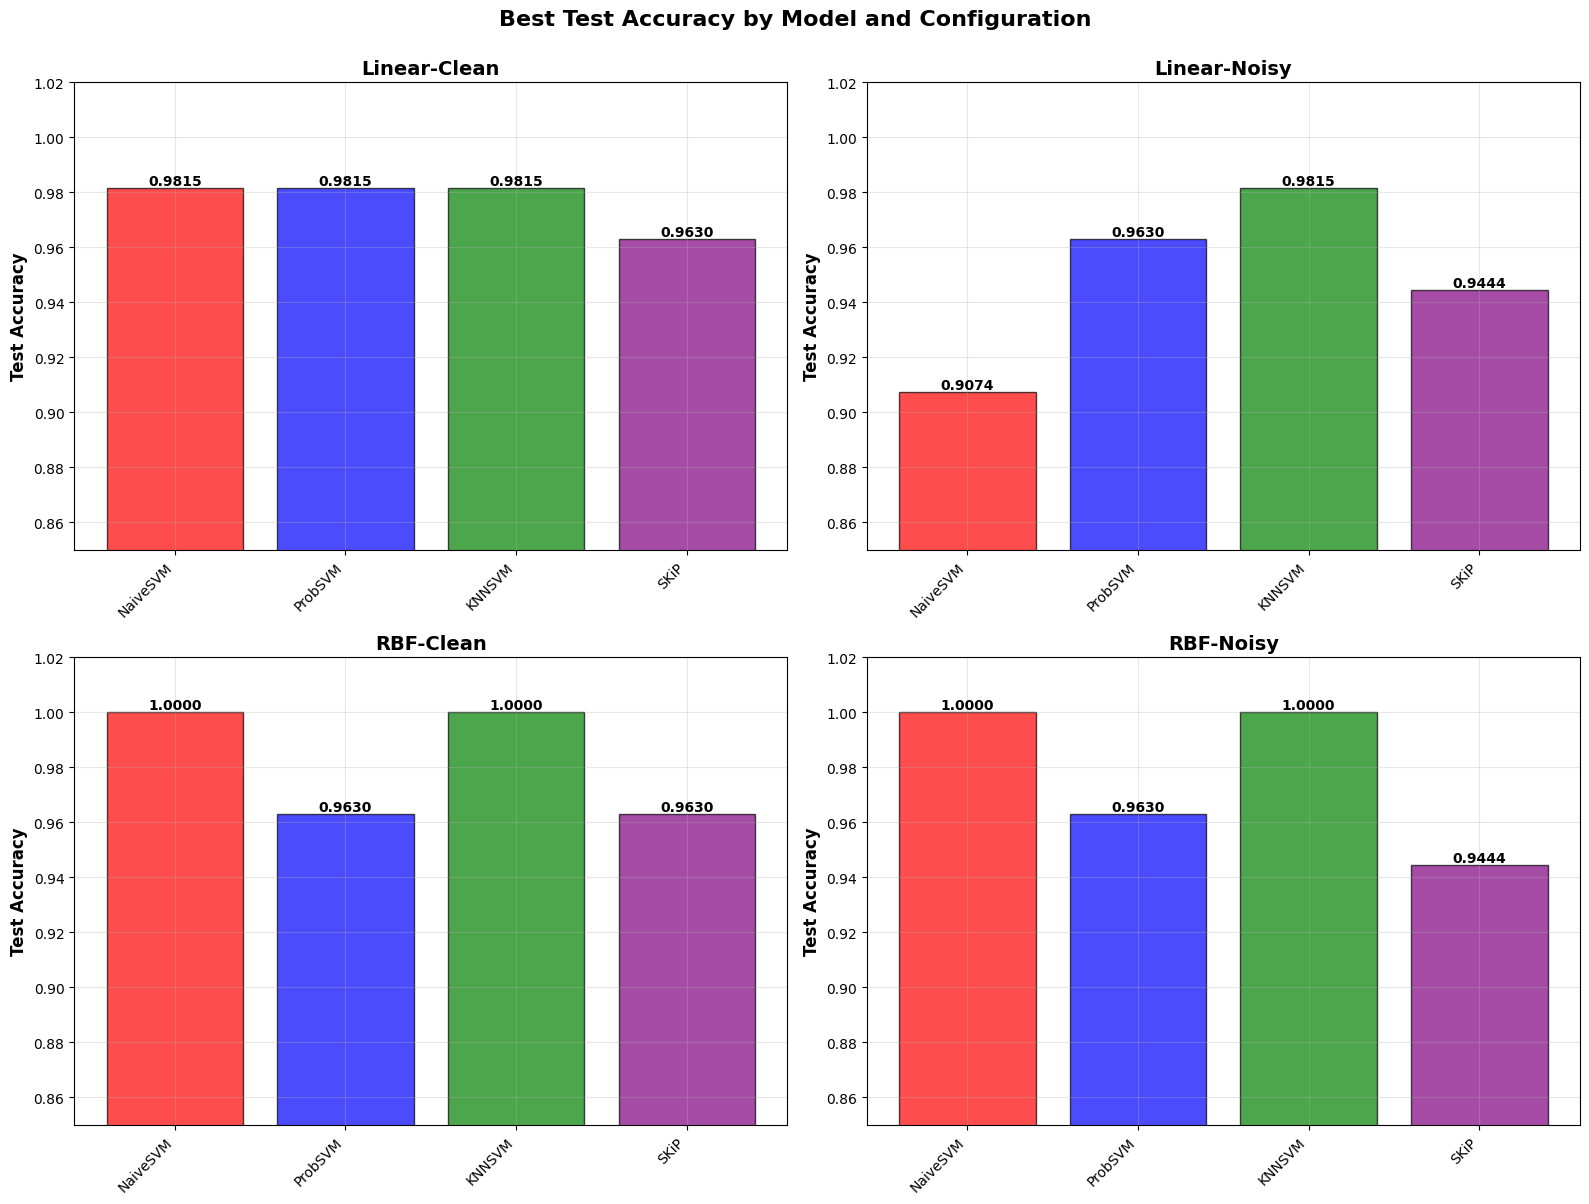

In [13]:
# Create comprehensive comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

configurations = [
    ('Linear-Clean', df_linear_clean, axes[0, 0]),
    ('Linear-Noisy', df_linear_noisy, axes[0, 1]),
    ('RBF-Clean', df_rbf_clean, axes[1, 0]),
    ('RBF-Noisy', df_rbf_noisy, axes[1, 1])
]

colors = {'NaiveSVM': 'red', 'ProbSVM': 'blue', 'KNNSVM': 'green', 'SKiP': 'purple'}

for title, df, ax in configurations:
    models = df['Model'].unique()
    x_pos = np.arange(len(models))
    
    best_accs = []
    for model in models:
        best_acc = df[df['Model'] == model]['Test Acc'].max()
        best_accs.append(best_acc)
    
    bars = ax.bar(x_pos, best_accs, color=[colors[m] for m in models], alpha=0.7, edgecolor='black')
    
    # Add value labels
    for i, (bar, acc) in enumerate(zip(bars, best_accs)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    ax.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.set_ylim([0.85, 1.02])
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Best Test Accuracy by Model and Configuration', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 4.3 Robustness Analysis: Clean vs Noisy Performance

In [14]:
# Calculate robustness metrics
robustness = []

for model in ['NaiveSVM', 'ProbSVM', 'KNNSVM', 'SKiP']:
    # Linear kernel
    clean_linear = df_linear_clean[df_linear_clean['Model'] == model]['Test Acc'].max()
    noisy_linear = df_linear_noisy[df_linear_noisy['Model'] == model]['Test Acc'].max()
    deg_linear = clean_linear - noisy_linear
    
    # RBF kernel
    clean_rbf = df_rbf_clean[df_rbf_clean['Model'] == model]['Test Acc'].max()
    noisy_rbf = df_rbf_noisy[df_rbf_noisy['Model'] == model]['Test Acc'].max()
    deg_rbf = clean_rbf - noisy_rbf
    
    robustness.append({
        'Model': model,
        'Linear Degradation': deg_linear,
        'RBF Degradation': deg_rbf,
        'Avg Degradation': (deg_linear + deg_rbf) / 2
    })

robustness_df = pd.DataFrame(robustness)
robustness_df = robustness_df.sort_values('Avg Degradation')

print("\n" + "="*80)
print("ROBUSTNESS RANKING (Lower degradation = More robust)")
print("="*80)
print(robustness_df.to_string(index=False))
print(f"\nMost Robust Model: {robustness_df.iloc[0]['Model']}")


ROBUSTNESS RANKING (Lower degradation = More robust)
   Model  Linear Degradation  RBF Degradation  Avg Degradation
  KNNSVM            0.000000         0.000000         0.000000
 ProbSVM            0.018519         0.000000         0.009259
    SKiP            0.018519         0.018519         0.018519
NaiveSVM            0.074074         0.000000         0.037037

Most Robust Model: KNNSVM


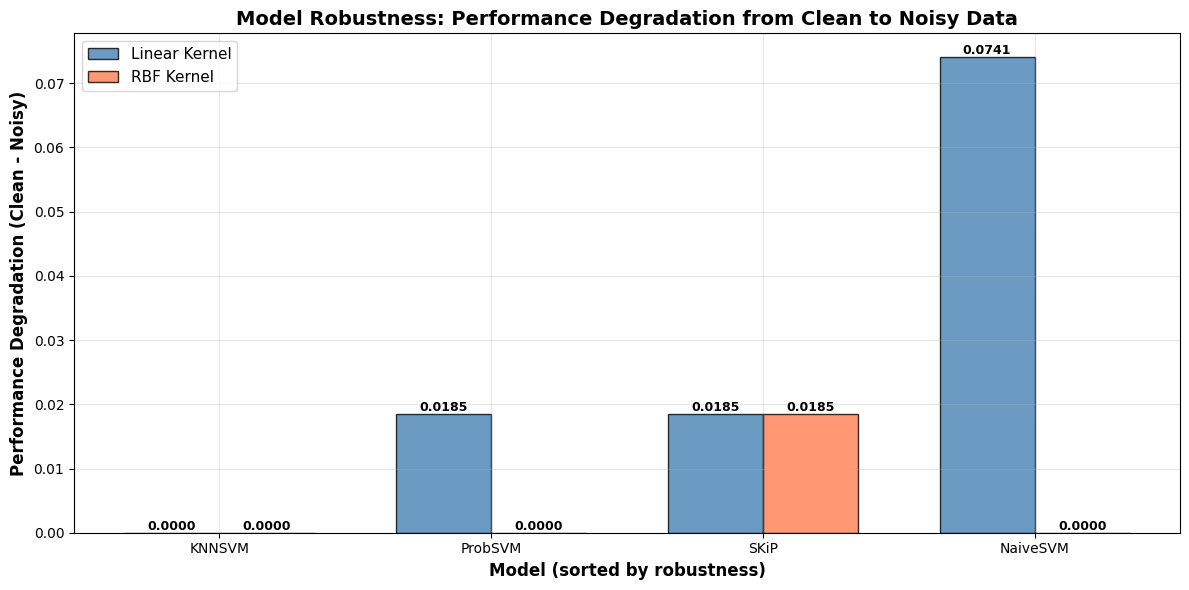

In [15]:
# Visualize robustness
fig, ax = plt.subplots(figsize=(12, 6))

models = robustness_df['Model'].values
x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, robustness_df['Linear Degradation'], width, 
               label='Linear Kernel', alpha=0.8, color='steelblue', edgecolor='black')
bars2 = ax.bar(x + width/2, robustness_df['RBF Degradation'], width,
               label='RBF Kernel', alpha=0.8, color='coral', edgecolor='black')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_ylabel('Performance Degradation (Clean - Noisy)', fontsize=12, fontweight='bold')
ax.set_xlabel('Model (sorted by robustness)', fontsize=12, fontweight='bold')
ax.set_title('Model Robustness: Performance Degradation from Clean to Noisy Data', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

## 5. Hyperparameter Analysis

### 5.1 Impact of C Parameter

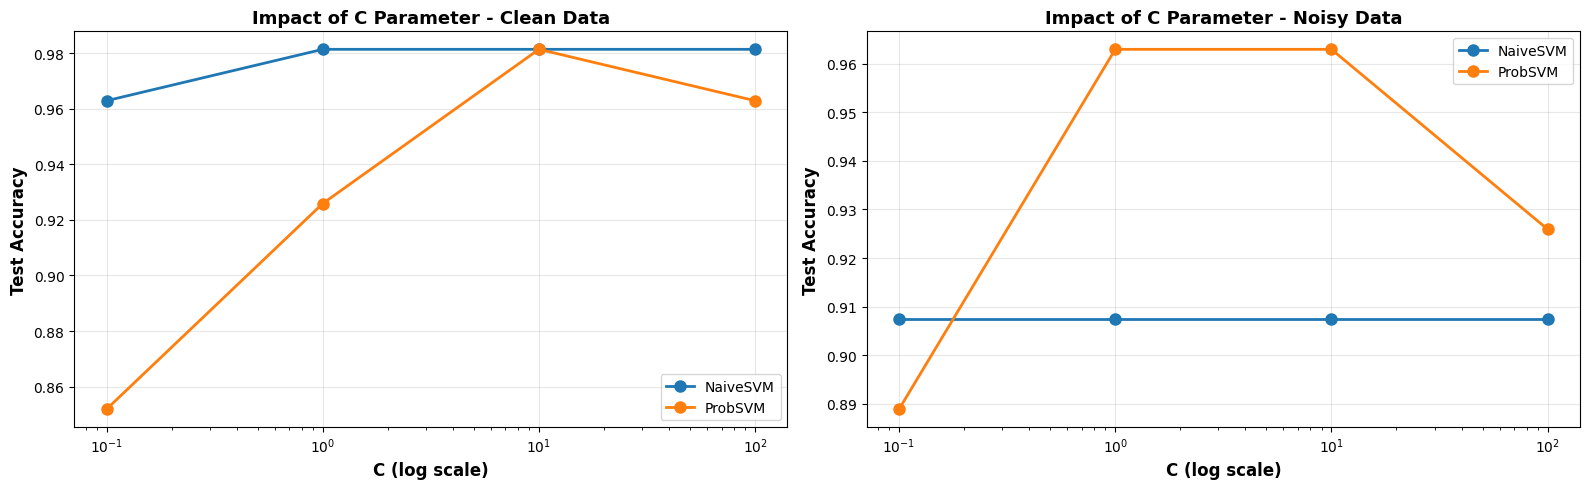

In [16]:
# Analyze C parameter impact (Linear kernel, Clean data)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for idx, (title, df) in enumerate([('Clean Data', df_linear_clean), ('Noisy Data', df_linear_noisy)]):
    ax = axes[idx]
    
    for model in ['NaiveSVM', 'ProbSVM']:
        model_df = df[df['Model'] == model]
        # Group by C and take max (for KNN models that have multiple k values)
        c_grouped = model_df.groupby('C')['Test Acc'].max().reset_index()
        ax.plot(c_grouped['C'], c_grouped['Test Acc'], 
                marker='o', label=model, linewidth=2, markersize=8)
    
    ax.set_xscale('log')
    ax.set_xlabel('C (log scale)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
    ax.set_title(f'Impact of C Parameter - {title}', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 5.2 Impact of k Parameter (for KNNSVM and SKiP)

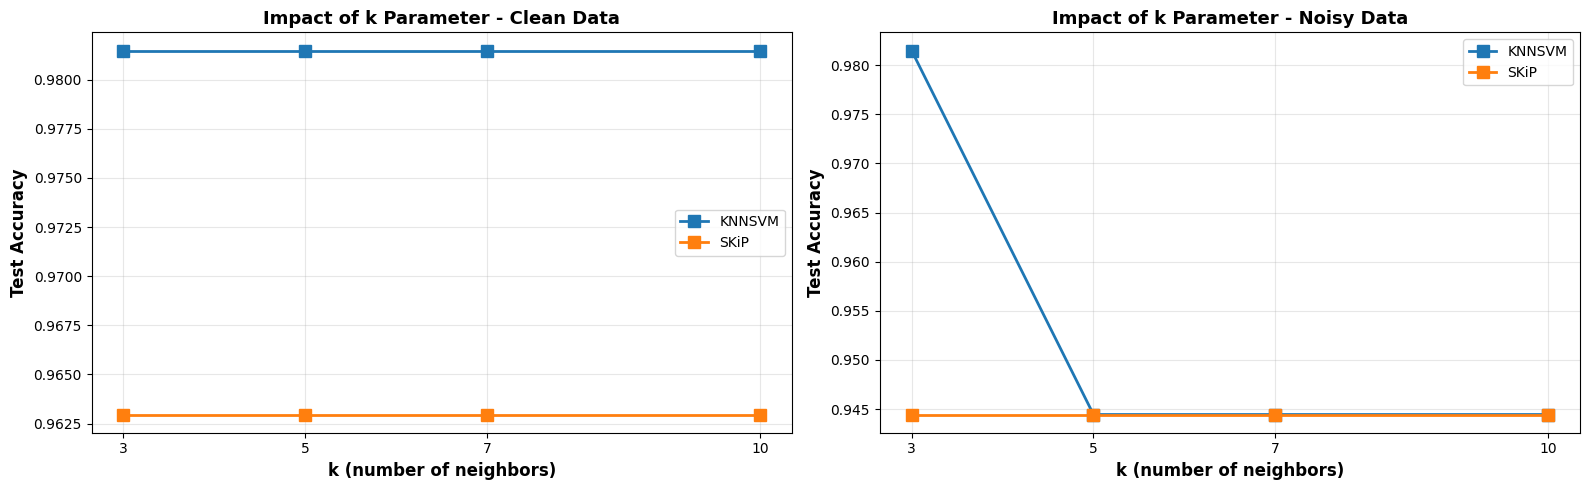

In [17]:
# Analyze k parameter impact (Linear kernel)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for idx, (title, df) in enumerate([('Clean Data', df_linear_clean), ('Noisy Data', df_linear_noisy)]):
    ax = axes[idx]
    
    for model in ['KNNSVM', 'SKiP']:
        model_df = df[(df['Model'] == model) & (df['k'].notna())]
        # Group by k and take max across different C values
        k_grouped = model_df.groupby('k')['Test Acc'].max().reset_index()
        ax.plot(k_grouped['k'], k_grouped['Test Acc'], 
                marker='s', label=model, linewidth=2, markersize=8)
    
    ax.set_xlabel('k (number of neighbors)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
    ax.set_title(f'Impact of k Parameter - {title}', fontsize=13, fontweight='bold')
    ax.set_xticks(k_values)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Impact of gamma Parameter (RBF kernel)

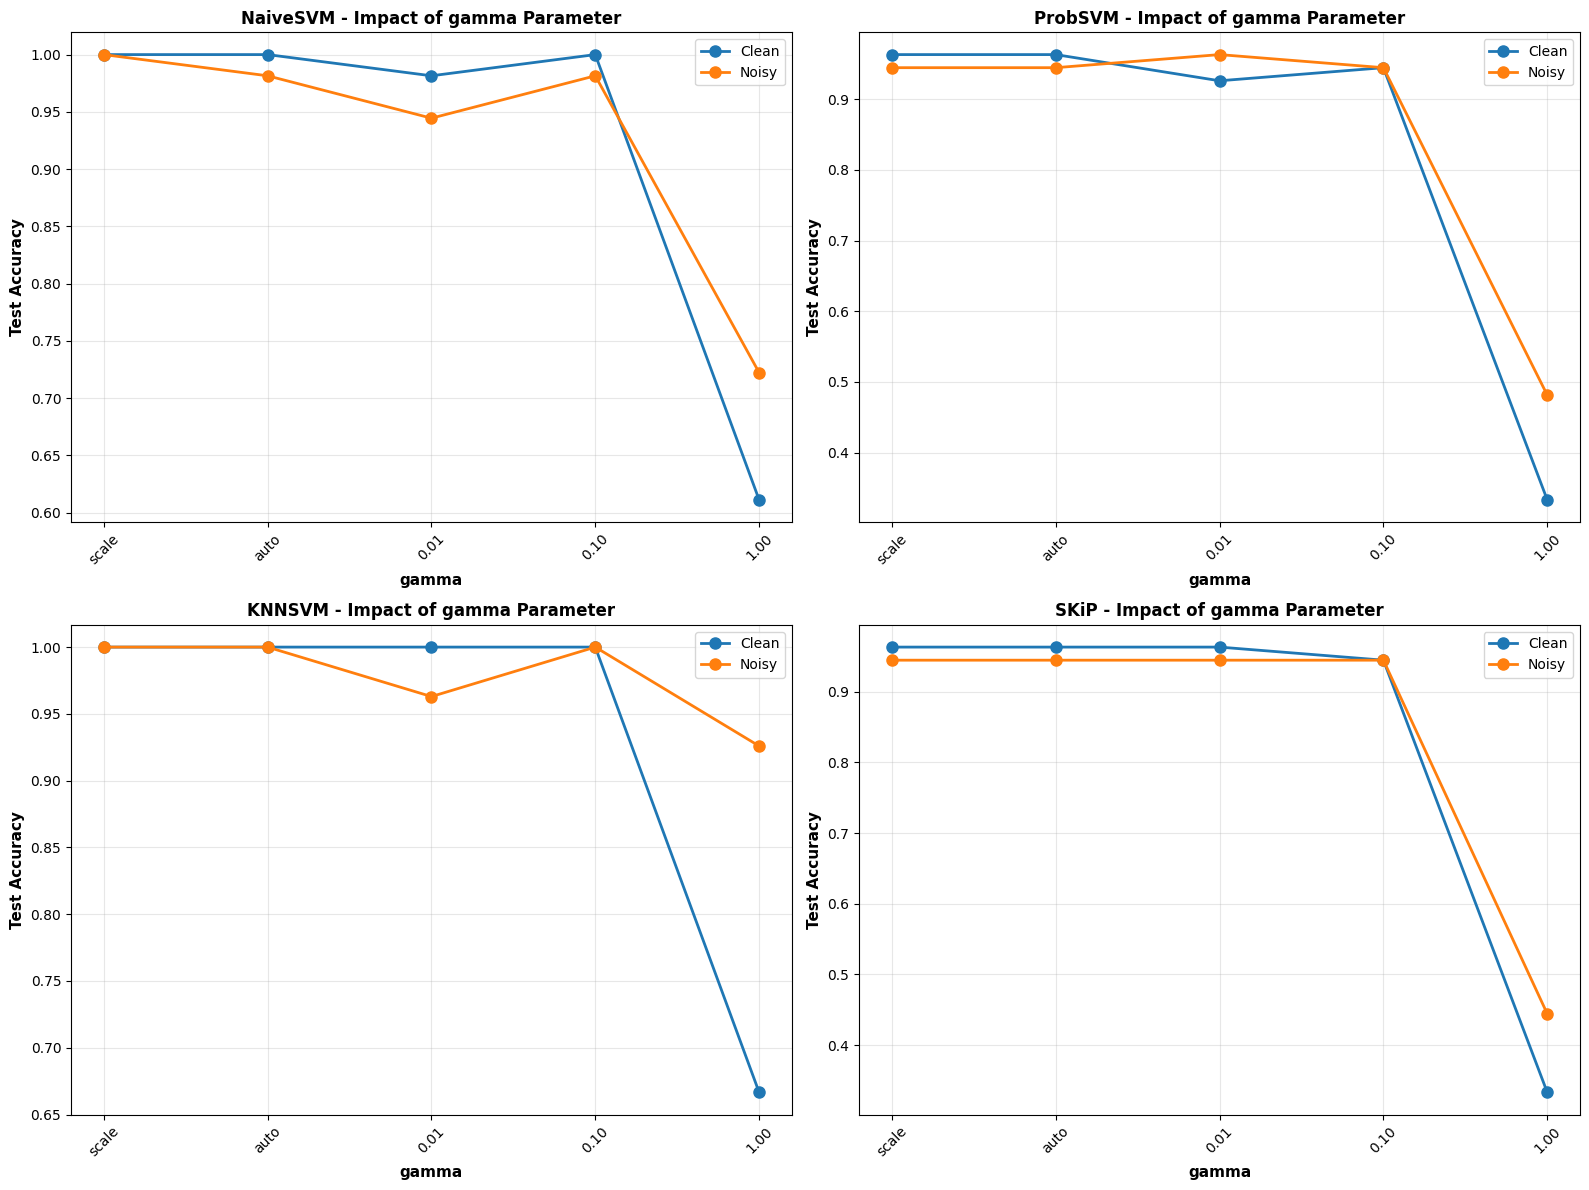

In [18]:
# Analyze gamma parameter impact
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

models_to_plot = ['NaiveSVM', 'ProbSVM', 'KNNSVM', 'SKiP']
datasets = [('Clean', df_rbf_clean), ('Noisy', df_rbf_noisy)]

for idx, model in enumerate(models_to_plot):
    ax = axes[idx]
    
    for data_type, df in datasets:
        model_df = df[df['Model'] == model]
        # Group by gamma and take max across C (and k for KNN models)
        gamma_grouped = model_df.groupby('gamma')['Test Acc'].max().reset_index()
        
        # Sort by custom order
        gamma_order = ['scale', 'auto', '0.01', '0.10', '1.00']
        gamma_grouped['gamma'] = pd.Categorical(gamma_grouped['gamma'], categories=gamma_order, ordered=True)
        gamma_grouped = gamma_grouped.sort_values('gamma')
        
        ax.plot(range(len(gamma_grouped)), gamma_grouped['Test Acc'], 
                marker='o', label=data_type, linewidth=2, markersize=8)
    
    ax.set_xlabel('gamma', fontsize=11, fontweight='bold')
    ax.set_ylabel('Test Accuracy', fontsize=11, fontweight='bold')
    ax.set_title(f'{model} - Impact of gamma Parameter', fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(gamma_order)))
    ax.set_xticklabels(gamma_order, rotation=45)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Support Vector Analysis

In [19]:
# Train models with best configurations and analyze support vectors
sv_comparison = []

configs = [
    ('Linear-Clean', X_train_scaled, y_train, 'linear'),
    ('Linear-Noisy', X_train_noisy, y_train_noisy, 'linear'),
    ('RBF-Clean', X_train_scaled, y_train, 'rbf'),
    ('RBF-Noisy', X_train_noisy, y_train_noisy, 'rbf')
]

for config_name, X_tr, y_tr, kernel in configs:
    print(f"\nAnalyzing Support Vectors: {config_name}")
    
    # NaiveSVM
    clf = OneVsRestSVM(NaiveSVM(C=1.0, kernel=kernel, verbose=False))
    clf.fit(X_tr, y_tr)
    total_sv = sum(len(est.support_) for est in clf.estimators_)
    sv_comparison.append({'Config': config_name, 'Model': 'NaiveSVM', 'Total SVs': total_sv})
    
    # ProbSVM
    clf = OneVsRestSVM(ProbSVM(C=1.0, kernel=kernel, verbose=False))
    clf.fit(X_tr, y_tr)
    total_sv = sum(len(est.support_) for est in clf.estimators_)
    sv_comparison.append({'Config': config_name, 'Model': 'ProbSVM', 'Total SVs': total_sv})
    
    # KNNSVM
    clf = OneVsRestSVM(KNNSVM(C=1.0, k=5, kernel=kernel, verbose=False))
    clf.fit(X_tr, y_tr)
    total_sv = sum(len(est.support_) for est in clf.estimators_)
    sv_comparison.append({'Config': config_name, 'Model': 'KNNSVM', 'Total SVs': total_sv})
    
    # SKiP
    clf = OneVsRestSVM(SKiP(C=1.0, k=5, kernel=kernel, verbose=False))
    clf.fit(X_tr, y_tr)
    total_sv = sum(len(est.support_) for est in clf.estimators_)
    sv_comparison.append({'Config': config_name, 'Model': 'SKiP', 'Total SVs': total_sv})

sv_df = pd.DataFrame(sv_comparison)
sv_pivot = sv_df.pivot(index='Model', columns='Config', values='Total SVs')

print("\n" + "="*80)
print("SUPPORT VECTOR COUNT COMPARISON")
print("="*80)
print(sv_pivot.to_string())


Analyzing Support Vectors: Linear-Clean

Analyzing Support Vectors: Linear-Noisy

Analyzing Support Vectors: Linear-Noisy

Analyzing Support Vectors: RBF-Clean

Analyzing Support Vectors: RBF-Clean

Analyzing Support Vectors: RBF-Noisy

Analyzing Support Vectors: RBF-Noisy

SUPPORT VECTOR COUNT COMPARISON
Config    Linear-Clean  Linear-Noisy  RBF-Clean  RBF-Noisy
Model                                                     
KNNSVM              38            85        131        213
NaiveSVM            34           179        123        291
ProbSVM            198           199        297        457
SKiP               197           181        293        426

SUPPORT VECTOR COUNT COMPARISON
Config    Linear-Clean  Linear-Noisy  RBF-Clean  RBF-Noisy
Model                                                     
KNNSVM              38            85        131        213
NaiveSVM            34           179        123        291
ProbSVM            198           199        297        457
SKiP      

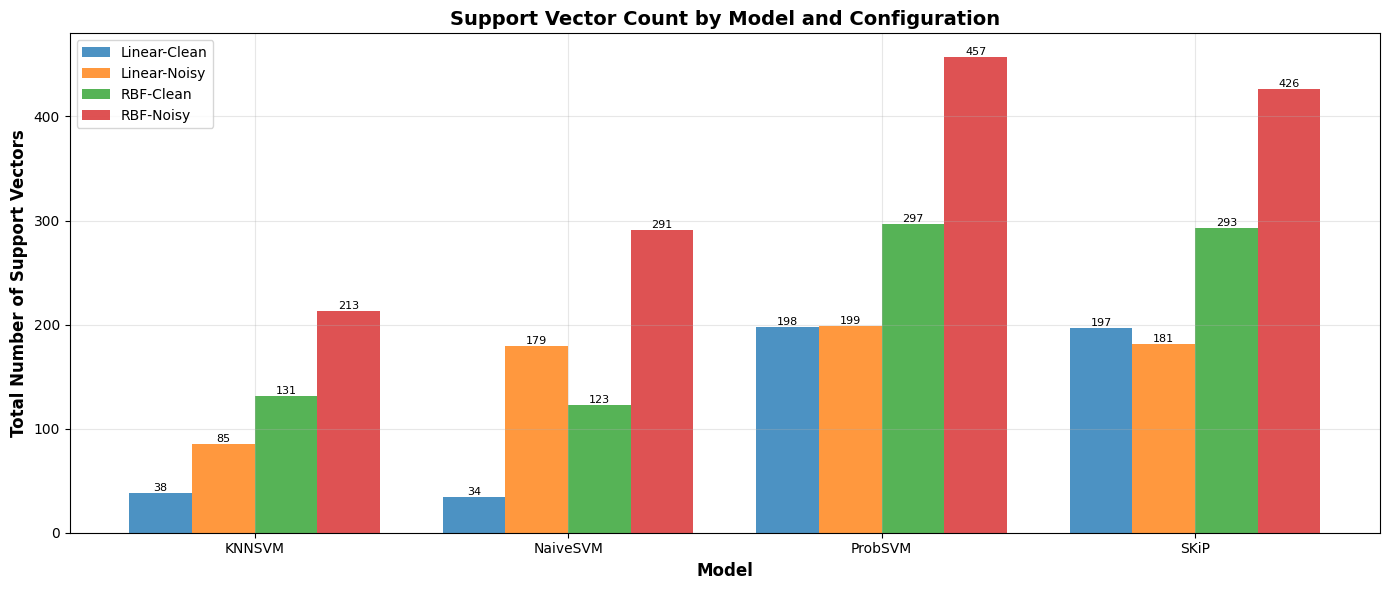

In [20]:
# Visualize support vector counts
fig, ax = plt.subplots(figsize=(14, 6))

configs_order = ['Linear-Clean', 'Linear-Noisy', 'RBF-Clean', 'RBF-Noisy']
models = sv_pivot.index.tolist()
x = np.arange(len(models))
width = 0.2

for i, config in enumerate(configs_order):
    offset = width * (i - 1.5)
    bars = ax.bar(x + offset, sv_pivot[config], width, label=config, alpha=0.8)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Total Number of Support Vectors', fontsize=12, fontweight='bold')
ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_title('Support Vector Count by Model and Configuration', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(fontsize=10, loc='upper left')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Final Recommendations

In [22]:
print("\n" + "="*100)
print("FINAL RECOMMENDATIONS")
print("="*100)

# Best overall performance
all_results = pd.concat([
    df_linear_clean.assign(Config='Linear-Clean'),
    df_linear_noisy.assign(Config='Linear-Noisy'),
    df_rbf_clean.assign(Config='RBF-Clean'),
    df_rbf_noisy.assign(Config='RBF-Noisy')
], ignore_index=True)

best_overall = all_results.loc[all_results['Test Acc'].idxmax()]
print(f"\n1. Best Overall Performance:")
print(f"   Model: {best_overall['Model']}")
print(f"   Configuration: {best_overall['Config']}")
print(f"   Test Accuracy: {best_overall['Test Acc']:.4f}")

# Most robust model
most_robust = robustness_df.iloc[0]
print(f"\n2. Most Robust Model (to noise):")
print(f"   Model: {most_robust['Model']}")
print(f"   Average Degradation: {most_robust['Avg Degradation']:.4f}")

# Best for clean data
clean_results = pd.concat([df_linear_clean, df_rbf_clean], ignore_index=True)
best_clean = clean_results.loc[clean_results['Test Acc'].idxmax()]
print(f"\n3. Best for Clean Data:")
print(f"   Model: {best_clean['Model']}")
print(f"   Test Accuracy: {best_clean['Test Acc']:.4f}")

# Best for noisy data
noisy_results = pd.concat([df_linear_noisy, df_rbf_noisy], ignore_index=True)
best_noisy = noisy_results.loc[noisy_results['Test Acc'].idxmax()]
print(f"\n4. Best for Noisy Data:")
print(f"   Model: {best_noisy['Model']}")
print(f"   Test Accuracy: {best_noisy['Test Acc']:.4f}")

# Efficiency (fewest support vectors with good performance)
sv_performance = sv_df.merge(
    all_results[['Model', 'Config', 'Test Acc']].groupby(['Model', 'Config']).max().reset_index(),
    on=['Model', 'Config']
)
sv_performance['SV per Acc'] = sv_performance['Total SVs'] / sv_performance['Test Acc']
most_efficient = sv_performance.loc[sv_performance['SV per Acc'].idxmin()]
print(f"\n5. Most Efficient (fewest SVs per accuracy point):")
print(f"   Model: {most_efficient['Model']}")
print(f"   Configuration: {most_efficient['Config']}")
print(f"   SVs: {most_efficient['Total SVs']:.0f}, Accuracy: {most_efficient['Test Acc']:.4f}")

print("\n" + "="*100)


FINAL RECOMMENDATIONS

1. Best Overall Performance:
   Model: NaiveSVM
   Configuration: RBF-Clean
   Test Accuracy: 1.0000

2. Most Robust Model (to noise):
   Model: KNNSVM
   Average Degradation: 0.0000

3. Best for Clean Data:
   Model: NaiveSVM
   Test Accuracy: 1.0000

4. Best for Noisy Data:
   Model: NaiveSVM
   Test Accuracy: 1.0000

5. Most Efficient (fewest SVs per accuracy point):
   Model: NaiveSVM
   Configuration: Linear-Clean
   SVs: 34, Accuracy: 0.9815



## 8. Export Results

In [ ]:
# # Save all results to CSV files
# df_linear_clean.to_csv('results_linear_clean.csv', index=False)
# df_linear_noisy.to_csv('results_linear_noisy.csv', index=False)
# df_rbf_clean.to_csv('results_rbf_clean.csv', index=False)
# df_rbf_noisy.to_csv('results_rbf_noisy.csv', index=False)
# summary_df.to_csv('results_summary.csv', index=False)
# robustness_df.to_csv('results_robustness.csv', index=False)
# sv_pivot.to_csv('results_support_vectors.csv')

# print("Results exported successfully!")
# print("Files created:")
# print("  - results_linear_clean.csv")
# print("  - results_linear_noisy.csv")
# print("  - results_rbf_clean.csv")
# print("  - results_rbf_noisy.csv")
# print("  - results_summary.csv")
# print("  - results_robustness.csv")
# print("  - results_support_vectors.csv")

Results exported successfully!
Files created:
  - results_linear_clean.csv
  - results_linear_noisy.csv
  - results_rbf_clean.csv
  - results_rbf_noisy.csv
  - results_summary.csv
  - results_robustness.csv
  - results_support_vectors.csv
